In [290]:
from cmdstanpy import CmdStanModel

import arviz as az
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import pandas as pd
import random as rd

df = pd.read_csv("house_data_sampled.csv").sample(100)
df.head()
df.columns

# plt.scatter(df['sqft_living'], df["price"])
# plt.title("Sqft / price")
# plt.show()

# plt.scatter(df['grade'], df["price"])
# plt.title("sqft lot")
# plt.show()

Index(['Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

<AxesSubplot:>

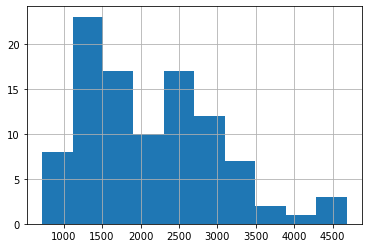

In [291]:
df['sqft_living'].hist()

<AxesSubplot:>

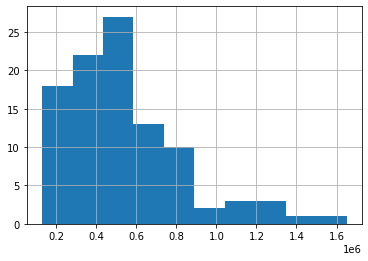

In [292]:
df['price'].hist()

<AxesSubplot:>

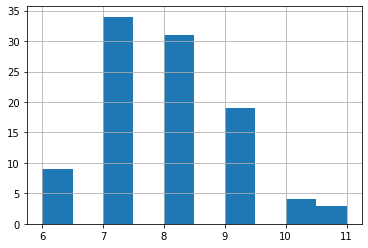

In [293]:
df['grade'].hist()

In [294]:
data = {'N': len(df['sqft_living']),
        'sqft': df['sqft_living']}
model_1_prior = CmdStanModel(stan_file='stan_1_ppc.stan')
model_1_prior_simulated = model_1_prior.sample(data=data, iter_sampling=1000, iter_warmup=0, chains=1, refresh=1000, fixed_param=True, seed=21370204)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [295]:
model_1_prior_simulated.summary()

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN
alpha,44000.0,77.0,2500.0,40000.0,44000.0,48000.0,1100.0,15000.0,1.0
beta,280.0,4.5,150.0,12.0,280.0,530.0,1200.0,16000.0,1.0
sigma,330.0,9.2,320.0,20.0,230.0,980.0,1200.0,17000.0,1.0
price[1],400042.0,5838.0,198340.0,60642.0,405349.0,727634.0,1154.0,16257.0,1.0
...,...,...,...,...,...,...,...,...,...
price[96],273074.0,3758.0,127639.0,54052.0,275586.0,484378.0,1154.0,16248.0,1.0
price[97],656730.0,10045.0,341281.0,71622.0,665142.0,1219330.0,1154.0,16259.0,1.0
price[98],659497.0,10091.0,342823.0,72118.0,668241.0,1224500.0,1154.0,16257.0,1.0


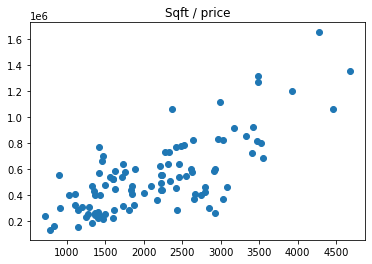

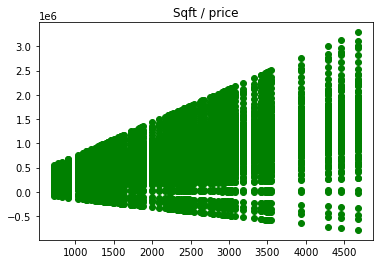

In [296]:
prices_sim=model_1_prior_simulated.stan_variable('price')
plt.scatter(df['sqft_living'], df["price"])
plt.title("Sqft / price")
plt.show()

prices_sim=model_1_prior_simulated.stan_variable('price')

for i in range(0,len(df['sqft_living'])):
    plt.scatter(df['sqft_living'], prices_sim[i], color="g")

plt.title("Sqft / price")
plt.show()

In [297]:
sqft_linspace = np.linspace(df['sqft_living'].min(),df['sqft_living'].max())


data = {'N': len(sqft_linspace),
        'sqft': sqft_linspace}
model_2_prior = CmdStanModel(stan_file='stan_2_ppc.stan')
model_2_prior_simulated = model_2_prior.sample(data=data, iter_sampling=1000, iter_warmup=0, chains=1, refresh=1000, fixed_param=True, seed=21370204)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [298]:
print(df['price'].max(), df['price'].min())

1650000.0 130000.0


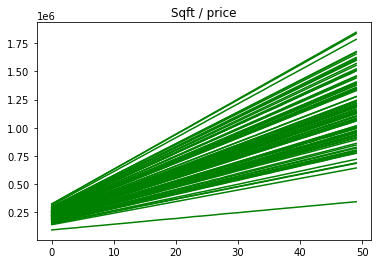

In [299]:
prices_sim=model_2_prior_simulated.stan_variable('price')

for i in range(0,len(df['sqft_living'])):
    plt.plot(range(len(sqft_linspace)), prices_sim[i], color="g")

# plt.scatter(df['sqft_living'], df["price"])

plt.title("Sqft / price")
plt.show()

<AxesSubplot:>

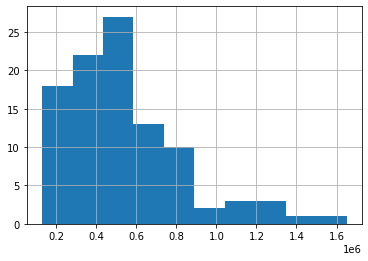

In [300]:
df['price'].hist()

In [301]:
data = {'N': len(df['sqft_living']),
        'sqft': df['sqft_living'],
        'price': df['price']}
model_1_posterior = CmdStanModel(stan_file='stan_1_posterior.stan')
model_1_posterior_simulated = model_1_posterior.sample(data=data, seed=21370204)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)




chain 1 |███████▎  | 00:00 Iteration: 1300 / 2000 [ 65%]  (Sampling)
chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


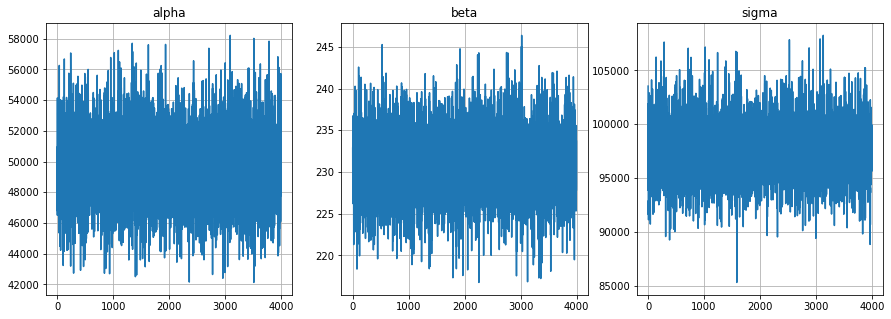

,mean,sd,hdi_3%,hdi_97%
alpha,49653.51,2488.65,45227.60,54539.50
beta,230.85,4.36,223.12,239.29
sigma,97693.15,2893.81,92371.00,103037.00


In [302]:
alpha_sim = model_1_posterior_simulated.stan_variable('alpha')
beta_sim = model_1_posterior_simulated.stan_variable('beta')
sigma_sim = model_1_posterior_simulated.stan_variable('sigma')
price_sim = model_1_posterior_simulated.stan_variable('price_sim')

fig, axs = plt.subplots(1,3)
fig.set_size_inches(15, 5)
axs[0].plot(alpha_sim)
axs[0].grid()
axs[0].set_title('alpha')
axs[1].plot(beta_sim)
axs[1].grid()
axs[1].set_title('beta')
axs[2].plot(sigma_sim)
axs[2].grid()
axs[2].set_title('sigma')
plt.show()

az.summary(model_1_posterior_simulated,var_names=['alpha','beta','sigma'],round_to=2,kind='stats')

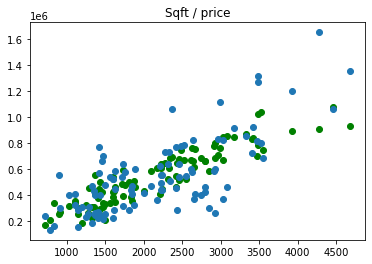

In [303]:
prices_sim=model_1_posterior_simulated.stan_variable('price_sim')

# for i in range(0,len(df['sqft_living'])):
plt.scatter(df['sqft_living'], prices_sim[1], color="g")

plt.scatter(df['sqft_living'], df["price"])

plt.title("Sqft / price")
plt.show()

## Adding second predictor to model

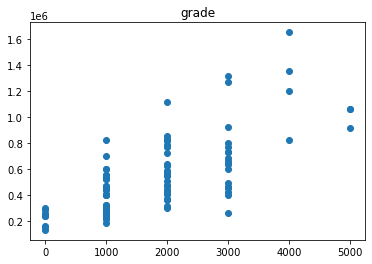

In [304]:
grade_modified = (df['grade']-6)*1000

plt.scatter(grade_modified, df["price"])
plt.title("grade")
plt.show()

In [305]:
len(df['sqft_living'])

100

In [306]:
# import pandas as pd
# from sklearn import linear_model
# import statsmodels.api as sm

# X = [df['sqft_living'], grade_modified] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
# Y = df['price']
 
# # with sklearn
# regr = linear_model.LinearRegression()
# regr.fit(X, Y)

# print('Intercept: \n', regr.intercept_)
# print('Coefficients: \n', regr.coef_)


ValueError: Found input variables with inconsistent numbers of samples: [2, 100]

In [308]:
data = {'N': len(df['sqft_living']),
        'sqft_living': df['sqft_living'],
        'grade': df['grade'],
        'price': df['price']}
model_two_param = CmdStanModel(stan_file='two_params.stan')
model_two_param_simulated = model_two_param.sample(data=data, seed=21370204)

# prices_sim=model_two_param_simulated.stan_variable('prices')

# x = range(len(df["sqft_living"]))

# plt.scatter(x, prices_sim[i], color="y")

# plt.scatter(x, df["price"])

# plt.title("Sqft / price")
# plt.show()

INFO:cmdstanpy:compiling stan file /home/nicolas/Projects/DA_project/two_params.stan to exe file /home/nicolas/Projects/DA_project/two_params
INFO:cmdstanpy:compiled model executable: /home/nicolas/Projects/DA_project/two_params
--- Translating Stan model to C++ code ---
bin/stanc  --o=/home/nicolas/Projects/DA_project/two_params.hpp /home/nicolas/Projects/DA_project/two_params.stan
Warning in '/home/nicolas/Projects/DA_project/two_params.stan', line 5, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in '/home/nicolas/Projects/DA_project/two_params.stan', line 31, column 3: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatic


INFO:cmdstanpy:CmdStan done processing.


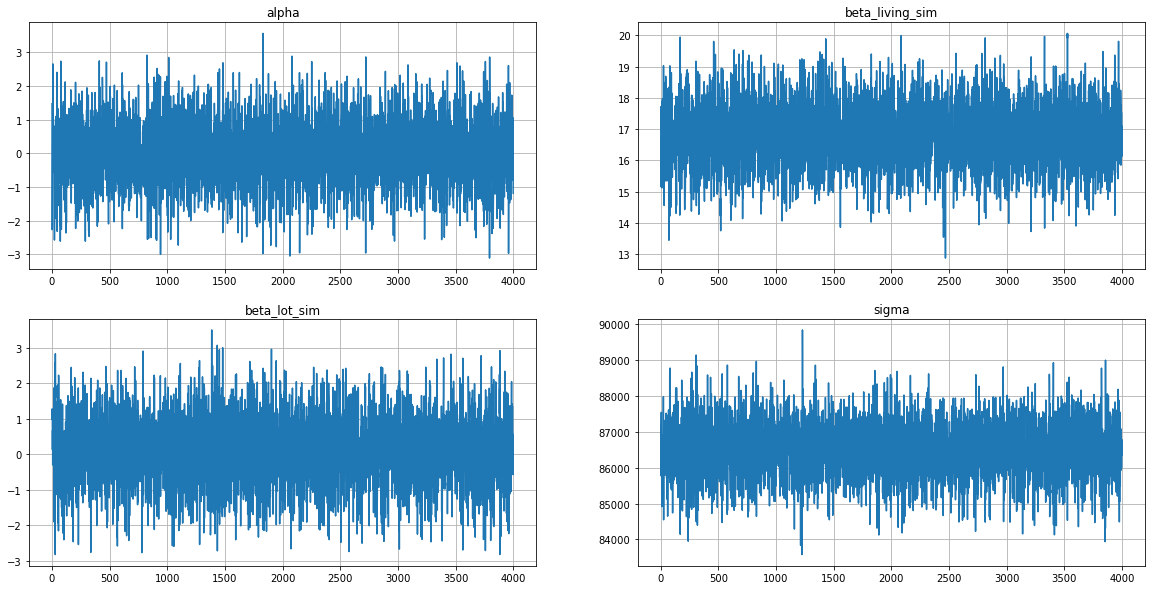

In [309]:
alpha_sim = model_two_param_simulated.stan_variable('alpha')
beta_living_sim = model_two_param_simulated.stan_variable('beta_sqft_living')
beta_lot_sim = model_two_param_simulated.stan_variable('beta_grade')
sigma_sim = model_two_param_simulated.stan_variable('sigma')
# price_sim = model_two_param_simulated.stan_variable('price')

fig, axs = plt.subplots(2,2)
fig.set_size_inches(20, 10)
axs[0][0].plot(alpha_sim)
axs[0][0].grid()
axs[0][0].set_title('alpha')
axs[0][1].plot(beta_living_sim)
axs[0][1].grid()
axs[0][1].set_title('beta_living_sim')
axs[1][0].plot(beta_lot_sim)
axs[1][0].grid()
axs[1][0].set_title('beta_lot_sim')
axs[1][1].plot(sigma_sim)
axs[1][1].grid()
axs[1][1].set_title('sigma')
plt.show()


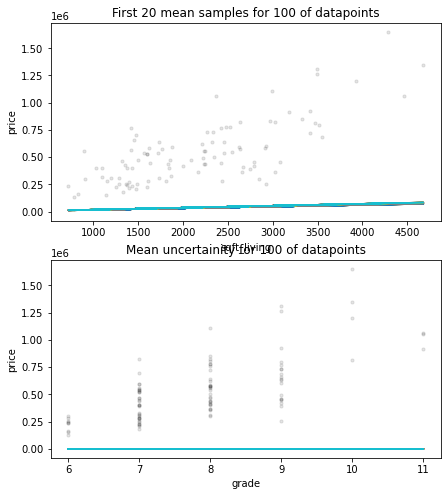

In [310]:
alpha_sim = model_two_param_simulated.stan_variable('alpha')
beta_living_sim = model_two_param_simulated.stan_variable('beta_sqft_living')
beta_grade_sim = model_two_param_simulated.stan_variable('beta_grade')
sigma_sim = model_two_param_simulated.stan_variable('sigma')
mu_sim = model_two_param_simulated.stan_variable('mu')

fig, axes = plt.subplots(2,1, figsize=(7, 8),sharey=True) 
ax0=axes[0]
for i in range(20):
    ax0.plot(df['sqft_living'],alpha_sim[i]+beta_living_sim[i]*df['sqft_living'])

ax0.scatter(df['sqft_living'],df['price'],color='black',alpha=0.1,s=10) 
ax0.set_title('First 20 mean samples for {} of datapoints'.format(len(df['sqft_living']))) 
ax0.set_ylabel('price')
ax0.set_xlabel('sqft_living')

ax1=axes[1]
ax1.scatter(df['grade'],df['price'],color='black',alpha=0.1,s=10) 

for i in range(20):
    ax1.plot(df['grade'],alpha_sim[i]+beta_grade_sim[i]*df['grade'])

ax1.set_xlabel('grade')
ax1.set_ylabel('price')
ax1.set_title('Mean uncertainity for {} of datapoints'.format(len(df['sqft_living']))) 
plt.show()

In [311]:
# Comparing 2 models: model_1 - with AGE only, model_2 - with AGE and BMI
idata1 = az.from_cmdstanpy(posterior = model_1_posterior_simulated, log_likelihood = "log_lik")
idata2 = az.from_cmdstanpy(posterior = model_two_param_simulated, log_likelihood = "log_lik") 
compare_dict = {"model_1": idata1, "model_2": idata2}
az.compare(compare_dict, ic = "loo") # loo stands for leave one out cross validation

/home/nicolas/anaconda3/envs/cmdstan/lib/python3.8/site-packages/arviz/stats/stats.py:145: UserWarning: The default method used to estimate the weights for each model,has changed from BB-pseudo-BMA to stacking
  warnings.warn(
/home/nicolas/anaconda3/envs/cmdstan/lib/python3.8/site-packages/arviz/stats/stats.py:655: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/home/nicolas/anaconda3/envs/cmdstan/lib/python3.8/site-packages/arviz/stats/stats.py:212: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_func(dataset, pointwise=True, scale=scale)])


,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
model_1,0,-1442.320807,10.036085,0.000000,0.979602,32.663816,0.000000,True,log
model_2,1,-3460.354846,37.930407,2018.034039,0.020398,268.019533,250.628246,True,log


In [312]:
# Comparing 2 models: model_1 - with AGE only, model_2 - with AGE and BMI
idata1 = az.from_cmdstanpy(posterior = model_1_posterior_simulated, log_likelihood = "log_lik")
idata2 = az.from_cmdstanpy(posterior = model_two_param_simulated, log_likelihood = "log_lik") 
compare_dict = {"model_1": idata1, "model_2": idata2}
az.compare(compare_dict, ic = "waic") # loo stands for leave one out cross validation

/home/nicolas/anaconda3/envs/cmdstan/lib/python3.8/site-packages/arviz/stats/stats.py:145: UserWarning: The default method used to estimate the weights for each model,has changed from BB-pseudo-BMA to stacking
  warnings.warn(
/home/nicolas/anaconda3/envs/cmdstan/lib/python3.8/site-packages/arviz/stats/stats.py:1405: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/home/nicolas/anaconda3/envs/cmdstan/lib/python3.8/site-packages/arviz/stats/stats.py:212: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_func(dataset, pointwise=True, scale=scale)])
/home/nicolas/anaconda3/envs/cmdstan/lib/python3.8/site-packages/arviz/stats/stats.py:1405: UserWarning: For one or more samples the posterior variance of the log pred

,rank,waic,p_waic,d_waic,weight,se,dse,warning,waic_scale
model_1,0,-1442.331537,10.046815,0.000000,0.979609,32.672643,0.000000,True,log
model_2,1,-3458.892471,36.468032,2016.560934,0.020391,267.380897,250.009483,True,log


/home/nicolas/anaconda3/envs/cmdstan/lib/python3.8/site-packages/arviz/stats/stats.py:145: UserWarning: The default method used to estimate the weights for each model,has changed from BB-pseudo-BMA to stacking
  warnings.warn(
/home/nicolas/anaconda3/envs/cmdstan/lib/python3.8/site-packages/arviz/stats/stats.py:655: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/home/nicolas/anaconda3/envs/cmdstan/lib/python3.8/site-packages/arviz/stats/stats.py:212: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_func(dataset, pointwise=True, scale=scale)])


<AxesSubplot:xlabel='Log'>

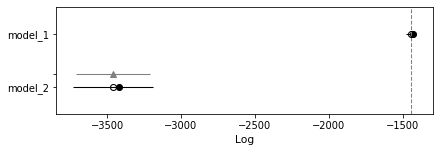

In [313]:
az.plot_compare(az.compare(compare_dict))
